Utkarsh sachdeva (sid)

<br>
Date: Jan. 24, 2024
<br>
PHYS 2030 W24

## <center><font color=#46769B>Exercise 3: Inverse CDF method for sampling from arbitrary distributions</font></center>

__Rubric__ (100 points total):

- Part (a) /__50 points__
     
- Part (b) /__20 points__

- Part (c) /__30 points__


## <font color=#46769B>Introduction:</font>

Cosmic rays are high-energy protons and heavier elements accelerated in stars and other astronomical environments that ultimately smash into Earth's atmosphere. These collisions produce showers of particles.

<div>
<img src="https://cdn.mos.cms.futurecdn.net/JZG8KC9eZovtTaXkvbbdiX-1024-80.jpg.webp" width="400">
</div>

Figure credit: [space.com](https://www.space.com/32644-cosmic-rays.html)

In this notebook, you will perform some Monte Carlo simulations related to cosmic rays. Here is a summary:

- Part (a): Simulation of the impact angle $\theta$ that the cosmic ray makes
     
- Part (b): Cosmic ray collisions can make a subatomic particle called a muon that is radioactively unstable. You will simulate its decay length $d$, the time it travels before decaying radioactively.
     
- Part (c): Simulation of the height $z$ above the Earth's surface where the muon decays.

Our goals for this notebook are:

- Gain experience with the inverse CDF method

Required reading:
- *Lesson 3: Sampling from arbitrary distributions*


## <font color=#46769B>Part (a): Cosmic ray impact angle</font>

Suppose cosmic rays are isotropic and homogenous in our local galactic neighborhood. They are likely to hit the Earth from any direction and at any position. When a cosmic ray hits the Earth, it will have an angle $\theta$ with respect to the atmosphere, shown in the figure here.

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/cosmic_rays.png" width="500">
</div>

The Earth is (approximately) a sphere of radius $R$. Since the cross sectional area of a sphere is a circle, to a cosmic ray, the Earth looks like a dart board.

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Darts_in_a_dartboard.jpg" width="400">
</div>

Here is another picture to have in mind. Without loss of generality, we orient our coordinate frame so the cosmic ray is pointing down.

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/cosmic-ray-fig-2.png" width="800">
</div>

The cosmic ray hits a sphere, the Earth __(a)__. In projection, this looks like a dart board, i.e., a circle __(b)__. Let's suppose the radius $s$ is the location where the cosmic ray hits the circular cross section of the Earth. (Note: $s \le R$, where $R$ is the radius of the earth.) Once we know $s$, we can figure out the angle the cosmic ray makes with some trigonometry __(c)__:

$$\sin\theta = s/R \, .$$

What is the probability of landing on a particular value of $s$? We need to know the PDF $P_s(s)$. (Here we attach an additional subscript $s$ to the PDF and CDF here to distinguish it from the PDF Parts (b) and (c).)

Note $P_s(s) ds$ is the probability of landing between $s$ and $s+ds$. This is

$$ P_s(s) \, ds = \frac{2 \pi s \, ds}{\pi R^2}$$

where the numerator is the area of a ring of radius $s$ and thickness $ds$, and the denominator is the area $\pi R^2$ of the entire circle.
The PDF is therefore

$$P_s(s) = \left\{ \begin{array}{cc} \frac{2 s}{R^2} & {\rm for} \; 0 \le s \le R \\ 0 & {\rm otherwise} \end{array} \right. \, .\qquad {\rm (1)}$$

Your tasks are as follows:

- Generate $N=10^6$ samples for $s$ from $P_s(s)$ in Eq. (1) using the inverse CDF method. Recall that the inverse CDF method requires four steps:

    1. Calculate the CDF $C_s(s) = \int_0^{s} dz \, P_s(z)$ analytically.

    2. Compute the inverse CDF $C^{-1}_s(r)$ by inverting the equation $r = C_s(s)$.
    
    3. Generate $N$ samples for $r$ from a uniform distribution in the interval $[0,1]$.
    
    4. Compute $N$ samples for $s$ from the inverse CDF, i.e., for each sample $r_i$ you compute a sample $s_i = C_s^{-1}(r_i)$.


- Make a histogram plot of your samples for $s$. On the same figure, plot the PDF $P_s(s)$. (Also, add a legend to label your histogram and plot for $P_s(s)$.)

- Generate $N$ samples for $\theta$ using the equation $\theta = \sin^{-1}(s/R)$.

- Calculate and print the mean and standard deviation for $\theta$ *in degrees*.

- What percentage of cosmic rays have $\theta$ within one sigma of the mean?

- Note: You may set $R=1$ for simplicity (i.e., work in units of "Earth radii").

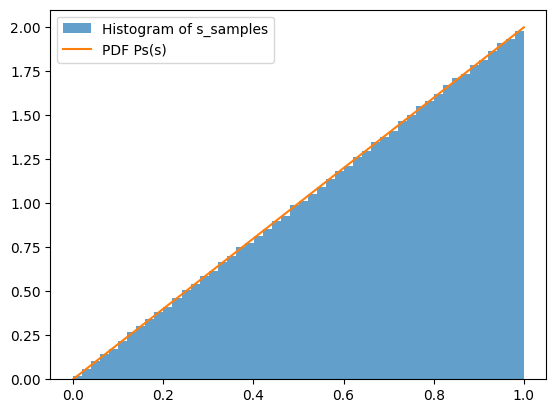

Mean of theta: 56.2659984902576 degrees
Standard deviation of theta: 16.025890659994324 degrees
The percentage of cosmic rays with an angle within one sigma of the mean is 64.9428%


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
N = 10**6

# Generate N samples for r from a uniform distribution in the interval [0, 1]
r_samples = np.random.uniform(0, 1, N)

# Set R for simplicity
R = 1

# Analytical expression for the inverse CDF
def inverse_CDF_analytical(r, R):
    return R * np.sqrt(r)

# Compute N samples for s using the inverse CDF
s_samples = inverse_CDF_analytical(r_samples, R)

# Plot histogram of s_samples and the PDF P_s(s)
plt.hist(s_samples, bins=50, density=True, alpha=0.7, label='Histogram of s_samples')
plt.plot(np.linspace(0, R, 100), [2 * x / R**2 for x in np.linspace(0, R, 100)], label='PDF Ps(s)')
plt.legend()
plt.show()

# Calculate the angle theta
theta_samples = np.arcsin(np.sqrt(s_samples))

# Calculate mean and standard deviation for theta in degrees
mu_theta = np.mean(np.degrees(theta_samples))
sigma_theta = np.std(np.degrees(theta_samples))

# Calculate the percentage of cosmic rays within one sigma of the mean
percentage_within_one_sigma = np.sum((mu_theta - sigma_theta <= np.degrees(theta_samples)) &
                                     (np.degrees(theta_samples) <= mu_theta + sigma_theta)) / N * 100

print(f'Mean of theta: {mu_theta} degrees')
print(f'Standard deviation of theta: {sigma_theta} degrees')
print(f'The percentage of cosmic rays with an angle within one sigma of the mean is {percentage_within_one_sigma}%')

## <font color=#46769B>Part (b): Muon decay length</font>

The __muon__ (labeled $\mu$) is an elementary particle that is similar to the electron, except it is about 200 times heavier and is unstable to radioactive decay. The lifetime of the muon is $\tau = 2.2\times 10^{-6}$ seconds, which means that a typical muon survives only a small fraction of a second after being produced, ultimately decaying into an electron and neutrinos. (For the curious reader, more information about muons can be found [here](https://en.wikipedia.org/wiki/Muon).)

One natural source of muons is high-energy cosmic rays. The cosmic rays are fast-moving protons and heavier elements. When they smash into the Earth's atmosphere, the collisions produce showers of particles, including muons. Muons travel nearly at the speed of light $c \approx 3 \times 10^5$ and nearly in the same direction as the original cosmic ray.

The law of radioactive decay tells us that the probability of a $\mu$ surviving until time $t$ is $e^{-t/\tau}$.
Conversely, the probability for a $\mu$ to decay *before* time $t$ is $(1-e^{-t/\tau})$. The latter is nothing more than the CDF:

$$ C_t(t) = \left\{ \begin{array}{cc} 1 - e^{-t/\tau} & {\rm for} \; t \ge 0 \\
0 & {\rm otherwise} \end{array} \right.$$

Since $P_t(t) = dC_t/dt$, we now have the PDF:

$$ P_t(t) = \left\{ \begin{array}{cc} \frac{1}{\tau} e^{-t/\tau} & {\rm for} \; t \ge 0 \\
0 & {\rm otherwise} \end{array} \right. \, , \qquad (2)$$

which you can verify has the correct normalization.

Your tasks are as follows:

- Generate $N=10^6$ samples for $t$ from $P_t(t)$ in Eq. (2) using the inverse CDF method.

- For a given muon decaying after time $t$, let's assume the distance it travels before decaying is $d = c t$. Using your samples for $t$, obtain samples for $d$ in ${\rm km}$.

- Plot a histogram of your samples for $d$. Include an $x$-axis label for your plot and use a log-scale for the $y$-axis.


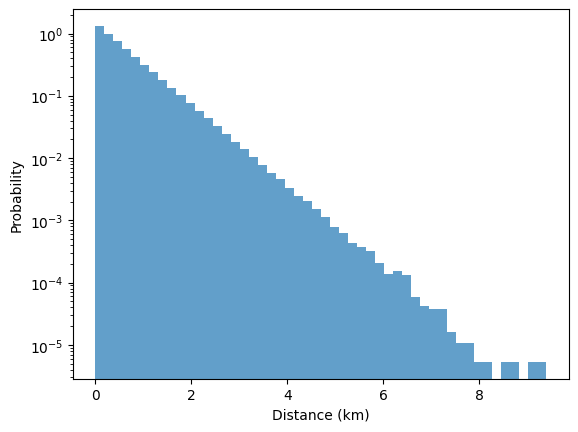

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
tau = 2.2e-6  # Lifetime of muon in seconds
c = 3e5  # Speed of light in km/s

def inverse_CDF_t_analytical(r):
    return -tau * np.log(1 - r)

N = 10**6
r_samples = np.random.uniform(0, 1, N)
t_samples = inverse_CDF_t_analytical(r_samples)

# Add a small positive constant to ensure strictly positive values
# epsilon = 1e-10
# t_samples = np.maximum(t_samples, epsilon)
d_samples = c * t_samples

plt.hist(d_samples, bins=50, density=True, alpha=0.7, label='Histogram of d_samples')
plt.xlabel('Distance (km)')
plt.ylabel('Probability')
plt.yscale('log')
plt.show()




## <font color=#46769B>Part (c): Height where muons decay</font>

The typical height above the surface of the Earth where cosmic rays collide with the atmosphere is $h = 15 \; {\rm km}$ (we take this as a fixed number). Suppose a cosmic ray impacts the atmostphere at height $h$ and with angle $\theta$, creating a muon which travels in the same direction.

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/Cosmic-ray-fig-3.png" width="800">
</div>

Next, the muon travels a distance $d = c t$ before it decays, where $t$ is the time it takes to decay. With some geometry, the height above the Earth's surface where the muon decays is

$$z = h - \frac{ct}{\cos\theta} \qquad (3)$$

Your tasks are as follows:

- Combining your $N=10^6$ samples for $\theta$ and $t$ from Parts (a) and (b), obtain samples for $z$ according to Eq. (3).

- Make a histogram of your samples for $z$. Use a log-scale on the $y$-axis, and include an $x$ label and appropriate number of bins.

- Determine the median, 99%, and 99.99% quantiles for $z$.

Observationally, a large fraction of muons do make it to the surface of the Earth and in fact can penetrate a great distance below. In contrast, following this exercise, you should find that most muons decay before reaching the surface. The resolution is that the muons experience [time dilation](https://en.wikipedia.org/wiki/Time_dilation), according to Special Relativity.

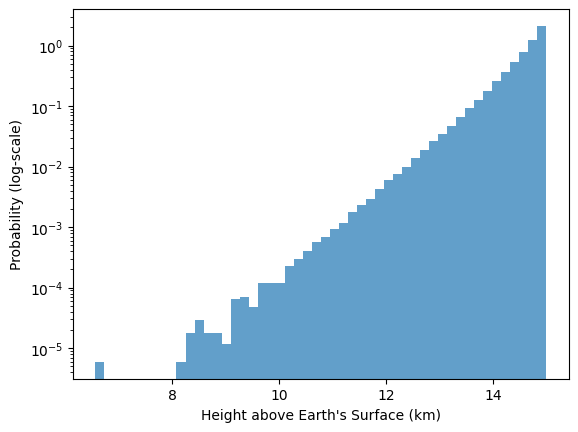

Median height: 14.723509381405208 km
99% quantile: 14.996631522271596 km
99.99% quantile: 14.999965511093677 km


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
tau = 2.2e-6  # Lifetime of muon in seconds
c = 3e5  # Speed of light in km/s
h = 15  # Height above the Earth's surface in km

def calculate_height(theta_samples, t_samples):
    return h - c * t_samples * np.abs(np.cos(theta_samples))

N = 10**6
R = 1
r_samples_a = np.random.uniform(0, 1, N)
s_samples = R * np.sqrt(r_samples_a)
theta_samples = np.arcsin(s_samples / R)
r_samples_b = np.random.uniform(0, 1, N)
t_samples = -tau * np.log(r_samples_b)
t_samples = np.maximum(t_samples, 1e-10)
z_samples = calculate_height(theta_samples, t_samples)

plt.hist(z_samples, bins=50, density=True, alpha=0.7, label='Histogram of z_samples', log=True)
plt.xlabel("Height above Earth's Surface (km)")
plt.ylabel('Probability (log-scale)')
plt.show()

median_z = np.median(z_samples)
quantile_99_z = np.percentile(z_samples, 99)
quantile_99_99_z = np.percentile(z_samples, 99.99)

print(f'Median height: {median_z} km')
print(f'99% quantile: {quantile_99_z} km')
print(f'99.99% quantile: {quantile_99_99_z} km')